# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML

In [4]:
data = pd.read_csv('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 4 - Feature Selection/Data/Insurance.csv')

In [5]:
data_dict = pd.read_excel('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 4 - Feature Selection/Data/Data_Dictionary_Insurance.xlsx')

In [6]:
# Checking Imported data size 

In [7]:
data.shape

(1338, 8)

In [8]:
data=data.drop(['id'],axis=1)

In [9]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Section 1 - Feature Selection for Regression Problem

# Defining Independent and Target Feature

In [10]:
# Create a indepedent feature dataframe
X=data.drop(['charges'],axis=1)

# Create a dependent feature dataframe
Y=data[['charges']]

In [11]:
Y.mean()

charges    13270.422265
dtype: float64

# Split features into Numerical and Categorical

In [12]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [13]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]
num_1.iloc[0]

age         19.0
bmi         27.9
children     0.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,age_Rank,bmi_Rank,children_Rank
0,1.0,3.0,0.0
1,0.0,7.0,1.0
2,2.0,6.0,3.0
3,3.0,0.0,0.0
4,3.0,4.0,0.0


C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


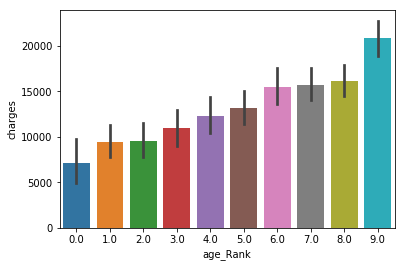

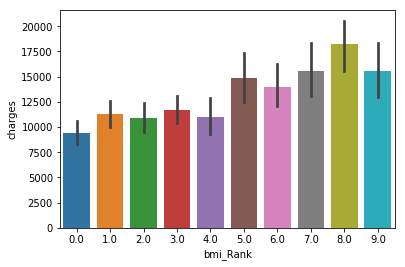

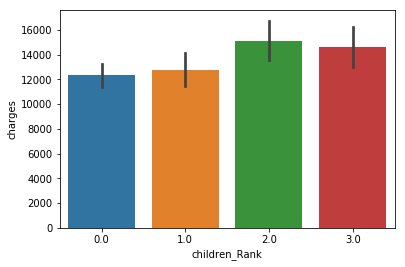

In [15]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="charges",data=X_bin_combined, estimator=mean )
plt.show()

In [16]:
num_varlist=['bmi','age']
select_features_df_num=num_1[num_varlist]

# Feature Selection - Categorical Features

# Part 1 - Bi Variate Analysis

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


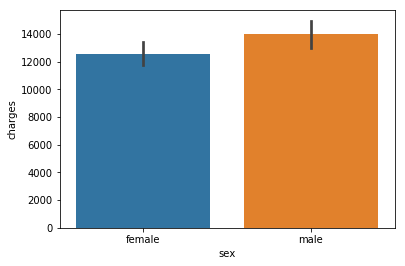

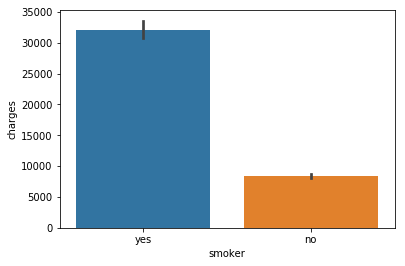

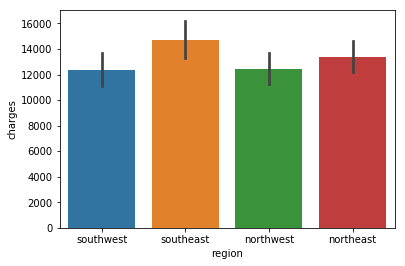

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="charges",data=X_char_merged, estimator=mean )
plt.show()

In [18]:
# Create dummy features with n-1 levels
select_features_df_char = pd.get_dummies(char, drop_first = True)
select_features_df_char.shape

(1338, 5)

# Section 2 - Feature Selection for Classification Problem

# Defining Independent and Target Feature

In [21]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Defining the Event (Target = 1)

In [22]:
data['target']=np.where(data['charges']>=16639,1,0)

In [23]:
data['target'].mean()

0.25037369207772797

In [24]:
# Create a indepedent feature dataframe
X=data.drop(['target','charges'],axis=1)

# Create a dependent feature dataframe
Y=data[['target']]

# Split features into Numerical and Categorical

In [25]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [26]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]
num_1.iloc[0]

age         19.0
bmi         27.9
children     0.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,age_Rank,bmi_Rank,children_Rank
0,1.0,3.0,0.0
1,0.0,7.0,1.0
2,2.0,6.0,3.0
3,3.0,0.0,0.0
4,3.0,4.0,0.0


C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


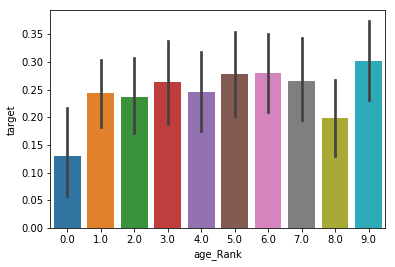

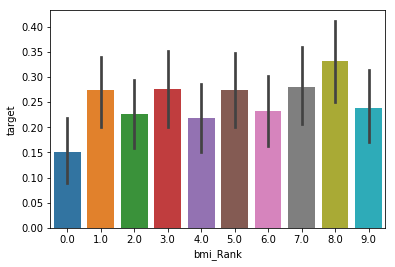

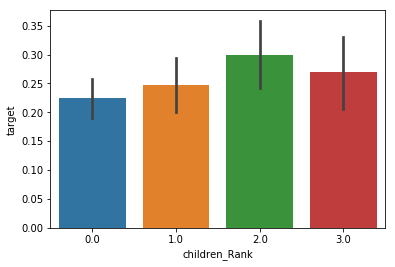

In [28]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [29]:
num_varlist=['bmi','age','children']
num_2=num_1[num_varlist]

# Part 3 - Select K Best

In [30]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=2)
selector.fit_transform(num_2, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]
select_features_df_num.iloc[0]

age    19.0
bmi    27.9
Name: 0, dtype: float64

# Feature Selection - Categorical Features

# Part 1 - Bi Variate Analysis

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


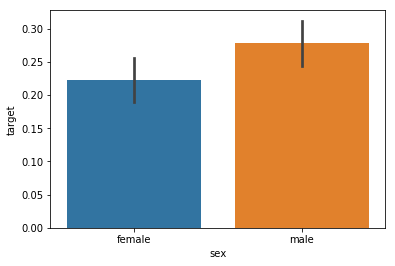

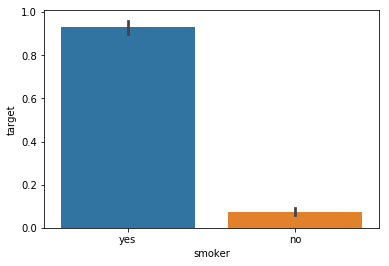

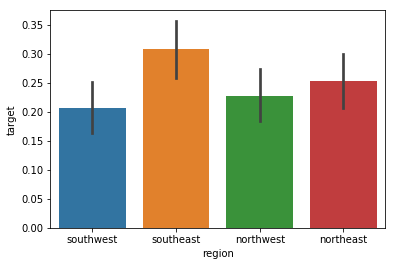

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [32]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(1338, 5)

In [33]:
X_char_dum.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


# Part 2 - Select K Best

In [34]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]
select_features_df_char.iloc[0]

sex_male            0
smoker_yes          1
region_southeast    0
region_southwest    1
Name: 0, dtype: uint8